In [ ]:
#hide cells with html: see JupyterBook
#extension cell tags
#break down forces operating on particles
#Link to index -> manual short way of navigating around
#multiple short pages
#anchor index
#table of contents in different places
#may open new pages -- annoying; book helps but doesn't have interactivity
#be able to go on to next section
#html versions of everything: don't have to have python to open jupyter notebook
#shows what you want to show, export, download as html

# Gas Drag in Synestias

There is a great deal of silicate vapor (also referred to as gas) in the moon-forming region of a synestia. Before a moon can coalesce out of a synestia, the smaller building blocks of a moon, moonlets (also called condensates and liquid droplets), must condense out of the cooled vapor in a synestia. Similarly, before a puddle can be pool on Earth's surface, water vapor must condense in Earth's atmosphere and rain to the surface.

Once a parcel of gas from the synestia condenses into a liquid droplet, that parcel is no longer coupled to its fellow gas parcels. The surrounding gas cannot support the condensate. The moonlet loses pressure support from the surrounding gas and begins to fall towards the midplane (z = 0), pulled by gravitational forces. As the droplet falls, it passes through gas, which imparts a drag on the moonlet and causes the droplet to slow down and lose angular velocity. The orbit of the moonlets will decay over time in accord with the strength of the gas drag acceleration.

Will this droplet make it to the midplane and help form a moon? Will this droplet re-vaporize? Or will this droplet be lost to the planet-like central region of the synestia? To answer this, we need to know how strong the gas drag force is. What affects the strength of gas drag?

## Gas Drag Equation

In [ ]:
#INSERT DIAGRAM HERE

Let's get a sense for the magnitude of gas drag acceleration that we're dealing with. It is assumed that the moonlets experience a simple gas drag (known as laminar flow). The equation is as follows:
$$a_{drag}=\frac{C_D\ A \ \rho_{gas} \ (u_{gas} - u_{body})^2}{2 \ m_{body}}$$

Simple gas drag acceleration a$_{drag}$ is dependent on:
the gas with density $\rho_{gas}$ that drags a body of mass $m_{body}$, the cross sectional area A of the body that the gas is interacting with (typically we assume solar system bodies are spherical, so they would have a circular cross section), the gas drag coefficient C$_D$ (what thermal regime we are in), and the relative velocity between the gas and the body being dragged u$_{gas}$-u$_{body}$. If the body were traveling at the same speed and in the same direction as the gas surrounding it, it wouldn't matter how fast the body was traveling, there would be no gas drag acting on the body. The differential between the speeds is what affects the gas drag's magnitude the most. Note that if the body is traveling at the same speed of the gas but in the <i>opposite direction</i>, gas drag <i>would</i> act on the body.

The gas drag acceleration is output in units of m/s$^2$, but for a more intuitive idea of how strong these accelerations are, see the different accelerations you may encounter on Earth displayed below the plot. They are output in terms of 'g' where 1 g = 9.8 m/s$^2$. In other words, 1 g is the gravitational acceleration here on (the surface of) Earth. These are next to various speeds in m/s for reference to the speed of each relative velocity.

In [1]:
import numpy as np
import math
from ipywidgets import *
import matplotlib.pyplot as plt

v_rel = np.arange(0.0, 300., 1.) #relative velocity between gas and body in m/s
Moon_density = 3300. #lunar density in kg/m3; 3.3 g/cc
gas_density0 = 1000. #kg/m^3 VERY dense gas in midplane
gas_density1 = 10. #kg/m^3 average gas in midplane at larger radii 
gas_density2 = .1 #kg/m^3 less dense gas (photosphere)

def pltdrag(rad_body, C_D, dens_gas):
    mass_body = Moon_density*(4./3.)*math.pi*(rad_body**3) #mass of body in kg; assume spherical body (and spherical cross section)
    a_drag = 0.5*C_D*math.pi*(rad_body**2)*dens_gas*(v_rel**2)/mass_body #acceleration imparted on body due to gas drag in m/s2
    plt.plot(v_rel, a_drag)
    plt.xlabel('velocity of the gas relative to the velocity of the moonlet (m/s)')
    plt.ylabel('gas drag acceleration (m/s$^2$)')
    plt.show()
    plt.close()

#PLOT ACCELERATION RELATIVE TO SOMETHING ELSE (g's, roller coasters, astronauts, etc.)    
#RELATIVE SCALE IN GENERAL: how big the moonlets are (marble, golf ball, grain of sand, yoga ball, soccer field, etc.), how fast the relative and absolute velocity is
#MAYBE THIS SHOULD BE PRINTED OUTPUT?    
style = {'description_width': 'initial'}
layout = {'width': '400px'}
%matplotlib inline
interact(pltdrag, rad_body=FloatLogSlider(value=1, base=10, min=-3, max=6, step=1, description='Size of moonlet (m)', style=style, layout=layout),
         C_D=FloatSlider(value=2, min=0, max=2.5, step=0.5, description='Gas drag coefficient C$_D$ (-)', continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         dens_gas=FloatLogSlider(value=1, base=10, min=-3, max=3, step=1, description='Gas density (kg/m$^3$)', style=style, layout=layout)
        )

#acceleration in terms of what we experience on Earth
accel_label=['on board space shuttle ISS','elevator headed up','gravitational pull on surface of Earth','roller coaster launch','space shuttle launch, gravitron amusement ride','top of roller coaster loop','maximum heavy braking on Formula One Car','maximum acceleration permitted on piloted planes','hard slap to the face, car crash','shock capacity of mechanical wrist watch','Mantis Shrimp claw strike','proton in Large Hadron Collider']
accel_g=['1e-6 g','0.2 g','1 g','1.5 g','3 g','5 g','6.3 g','10 g','100 g','5000 g','10400 g','190000000 g']
left_box0=widgets.VBox([widgets.Label(str(i)) for i in accel_label])
right_box0=widgets.VBox([widgets.Label(str(i)) for i in accel_g])

#velocity in terms of what we experience on Earth
vel_label=['Walking','Biking','Usain Bolt sprinting','Train','Car moving 100 mph (160 km/h)','Helicopter','Commerical airplane','Speed of sound in air (sound barrier)']
vel_ms=['1.5 m/s','4.5 m/s','12.5 m/s','27 m/s','45 m/s','70 m/s','220 m/s','343 m/s']
left_box1=widgets.VBox([widgets.Label(str(i)) for i in vel_label])
right_box1=widgets.VBox([widgets.Label(str(i)) for i in vel_ms])

widgets.HBox([left_box0,right_box0,left_box1,right_box1])

interactive(children=(FloatLogSlider(value=1.0, description='Size of moonlet (m)', layout=Layout(width='400px'…

As expected, for the same gas field, gas drag acceleration is greater when the mass of the moonlet is smaller and the gas drag coefficient and relative velocity are larger. Gas drag will be stronger in a more dense gas field.

Now, we would like to see how this gas drag affects how a single moonlet travels through the vapor in a synestia. For comparison, here is a plot of the orbit without the gas drag. The second plot shows the initial setup of the first plot with the addition of gas drag.

In the first plot, you can see how a moon travels when only a synestia's gravity (first and second order) is at play, so that we have a baseline to compare to. The oblateness of a synestia's gravity field is non-negligible. A synestia's gravity field has extra gravitational acceleration closest to both the midplane and center of a synestia due to the oblateness of a synestia. Notice how any orbits off the midplane are affected by the J$_2$ term in a synestia's gravity. The orbit of a moonlet within the gravity field of an Earth-mass synestia is shown below. The equivalent Keplerian orbit (first order gravity only) is shown for reference.

In the second plot, you can see how the gas drag significantly decays and circularizes the orbit of the moonlet over time. In order to form a moon, these moonlets must survive long enough to collide and grow into a large enough body that is not heavily affected by gas drag and will remain in orbit around the synestia without breaking up from tidal forces. Otherwise, the masses of the moonlets will be added to the center of a synestia (extends to about 7,000-10,000 km) and lost to the moon-forming region of a synestia.

When a moonlet is formed, it will condense as a droplet at the photosphere (where the vapor saturates and has a pressure that lies on the vapor dome; think of this as the "cloud line"). Pressure from the surrounding gas will no longer be able to buoy the now dense droplet at its current height, so it will fall towards the midplane, pulled by gravity. The moon will oscillate near the midplane until it equilibrates; this should happen relatively quickly. Bigger moons are formed in the midplane, because they grow from colliding with other moonlets that reach the midplane.

You will have four options in the interactives below. You will be able to initialize the moonlet at the photosphere or in the midplane. You can control the size of the moonlets, though it is more likely for smaller mass moonlets (roughly cm-sized) to form at the photosphere and for moonlets in the midplane to be more massive (due to the addition of moonlets raining from the photosphere). In potential Moon-forming synestias, the gas drag coefficient is 2 (has a minimal effect on the gas drag magnitude anyways), so this has been set for you. The velocity of the moonlet and the surrounding gas will be calculated according to what is expected in a typical Moon-forming synestia, so you won't have control over these either. However, you will have control of the gas density gradient and be able to change how quickly density decreases radially and off the midplane.

In [2]:
#J2 gravity orbits
#put with gas drag, so can compare side-by-side
import rebound
from syndef import synfits #import synestia snapshot (impact database)

#G=6.674e-11 #gravitational constant in SI
Mass_syn=np.sum(synfits.SNAP_CukStewart.m) #Earth mass synestia in kg
dens=3300. #kg/m^3 lunar density

def pltKep(rad_moon,sma,i,ecc):
    #rad_moon is the bodily radius of the moon
    #i is the inclination of the moon's orbital plane
    #sma is the semi-major axis of the moon's orbit
    #ecc is the eccentricity of the moon's orbit
    m_moon = 4.*math.pi*dens*(rad_moon**3)/3.
    sim = rebound.Simulation() #start simulation
    sim.units = ('Hr', 'M', 'Kg') #use SI units
    sim.add(m=Mass_syn) #add central body
    sim.add(m=m_moon,a=sma,inc=i,e=ecc)
    fig,ax_main,ax_sub1,ax_sub2 = rebound.OrbitPlot(sim,slices=1,xlim=[-120000000,60000000],ylim=[-60000000,60000000],unitlabel='(m)')

J2Ma2 = synfits.SNAP_Canup.J2Ma2
def J2(reb_sim):
    ps = reb_sim.particles
    r_orb = (ps[1].x**2 + ps[1].y**2 + ps[1].z**2)**0.5
    costheta = ps[1].z/r_orb
    grav2 = 3.0*reb_sim.G*J2Ma2*(r_orb**(-5))
    ps[1].ax -= ps[1].x*grav2*( 2.5*costheta*costheta - 0.5 )
    ps[1].ay -= ps[1].y*grav2*( 2.5*costheta*costheta - 0.5 )
    ps[1].az -= ps[1].z*grav2*( 2.5*costheta*costheta - 1.5 )

from rebound.plotting import fading_line
def pltJ2(rad_moon,sma,i,ecc):
        #rad_moon is the bodily radius of the moon
    #i is the inclination of the moon's orbital plane
    #sma is the semi-major axis of the moon's orbit
    #ecc is the eccentricity of the moon's orbit
    m_moon = 4.*math.pi*dens*(rad_moon**3)/3.
    sim_kep = rebound.Simulation() #start simulation
    sim_kep.units = ('Hr', 'M', 'Kg') #use SI units
    sim_kep.add(m=Mass_syn) #add central body
    sim_kep.add(m=m_moon,a=sma,inc=i,e=ecc)
    ps_kep = sim_kep.particles
    kep_moon = ps_kep[1]
    kep_orbit = np.asarray(kep_moon.sample_orbit())
    sim_j2 = rebound.Simulation() #start simulation
    sim_j2.units = ('Hr', 'M', 'Kg') #use SI units
    sim_j2.add(m=Mass_syn) #add central body
    sim_j2.add(m=m_moon,a=sma,inc=i,e=ecc)
    sim_j2.additional_forces = J2
    ps_j2 = sim_j2.particles
    j2_moon = ps_j2[1]
    j2_orbit = np.asarray(j2_moon.sample_orbit())
    fig,ax_main,ax_sub1,ax_sub2 = rebound.OrbitPlot(sim_j2,slices=1,xlim=[-120000000,60000000],ylim=[-60000000,60000000],unitlabel='(m)',color=True)
    lc_main = fading_line(kep_orbit[:,0], kep_orbit[:,1], linewidth=1)
    lc_sub1 = fading_line(kep_orbit[:,0], kep_orbit[:,2], linewidth=1)
    lc_sub2 = fading_line(kep_orbit[:,2], kep_orbit[:,1], linewidth=1)
    ax_main.add_collection(lc_main)
    ax_sub1.add_collection(lc_sub1)
    ax_sub2.add_collection(lc_sub2)
    
style = {'description_width': 'initial'}
layout = {'width': '400px'}
interact(pltJ2,
         rad_moon=FloatSlider(value=1, min=1, max=100, step=10, description='Body radius of moonlet (m)',
                            continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         sma=FloatSlider(value=20e6, min=10e6, max=60e6, step=10e6, description='Semi-major axis (m)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         i=FloatSlider(value=0, max=2.*math.pi, step=0.2, description='Inclination of orbit (radians)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         ecc=FloatSlider(value=0, max=0.9, step=0.1, description='Eccentricity of orbit (unitless)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         )

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Body radius of moonlet (m)'…

<function __main__.pltJ2(rad_moon, sma, i, ecc)>

The corresponding decay timescales are plotted above as well.

### Decaying Orbits: moonlets dragged by gas in a synestia

In [ ]:
from syndef import synfits #import synestia snapshot (impact database)
print(synfits.SNAP_Canup.rhomidfit)
#print(synfits.SNAP_CukStewart.rhomidfit)
#print(synfits.SNAP_Quintana.rhomidfit)

In [ ]:
#from syndef import synfits #import synestia snapshot (impact database)
rxy=np.log10(np.linspace(7e6,60e6,100)/1e6)
y=np.zeros(np.shape(rxy))
#print(synfits.SNAP_Canup.rhomidfit)
#print(synfits.SNAP_CukStewart.rhomidfit)
#print(synfits.SNAP_Quintana.rhomidfit)
rho1=synfits.resfuncspl(synfits.SNAP_Canup.rhomidfit[1],rxy,y)
snaprho=np.log10(synfits.SNAP_Canup.rho[synfits.SNAP_Canup.ind_outer_mid])
snaprxy=np.log10(synfits.SNAP_Canup.rxy[synfits.SNAP_Canup.ind_outer_mid]/1e6)
plt.figure()
plt.plot(rxy,rho1,'b')
plt.plot(snaprxy,snaprho,'r')
plt.xlabel('log r$_{xy}$ (Mm)')
plt.ylabel('log midplane density (kg/m$^3$)')
plt.show()
plt.close()

In [ ]:
import math
import numpy as np
import rebound
import matplotlib.pyplot as plt
Mass_syn=1e24#np.sum(synfits.SNAP_CukStewart.m) #Earth mass synestia in kg
dens=3000. #density of moonlet kg/m3
#def pltdrag(r0,x0,y0,z0)
G_hr=(6.674e-11)*(3600**2) #gravitational constant converted to m^3 kg^-1 hr^-2
r0=1e3 #body radius of moonlet in m
#widgets.Dropdown(
#    options=[('Coarse sand (mm)', 1.e-3),
#             ('Diameter of a belly button (cm)', 1.e-2),
#             ('Coconut (dm)', 0.1),
#             ('Cow (m)', 1.),
#             ('230 story building (km)', 1.e3),
#             ('Width of the United States (Mm)', 1.e6),
#             ('The Moon (3.5 Mm)', 3.5e6)],
#    value=1.,
#    description='Size (diameter) of moonlet:',
#    style=style
#)
m0=4.*math.pi*dens*(r0**3)/3. #mass of moonlet in kg
x0=20e6 #initial x position of moonlet in m
y0=0 #initial y position of moonlet in m
z0=0 #initial z position of moonlet in m
s0=(x0**2 + y0**2)**0.5 #initial moonlet distance from rotational axis in m
v_gas=0.95*(G_hr*Mass_syn/s0)**0.5 #sub-Keplerian gas velocity m/hr #0.01*(10.**(0.15599001870969695*np.log10(s0) - 1.6401471197424731))*((G_hr*Mass_syn/s0)**0.5)
vx0=-v_gas*y0/s0 #x-component of sub-Keplerian gas velocity m/hr
vy0=v_gas*x0/s0 #y-component of sub-Keplerian gas velocity m/hr
sim_drag = rebound.Simulation() #start simulation
sim_drag.units = ('Hr', 'M', 'Kg') #use SI units, seconds not available
sim_drag.add(m=Mass_syn) #add central body: Earth mass synestia
sim_drag.add(m=m0,r=r0) #add moonlet to simulation
ps_drag = sim_drag.particles #initialize particle class (holds xyz position information)
ps_drag[1].x=x0 #set initial x position of moonlet in m
ps_drag[1].y=y0 #set initial y position of moonlet in m
ps_drag[1].z=z0 #set initial z position of moonlet in m
ps_drag[1].vx=vx0 #set initial x velocity of moonlet in m/hr #intial velocities will be same as gas
ps_drag[1].vy=vy0 #set initial y velocity of moonlet in m/hr
ps_drag[1].vz=0 #set initial z velocity of moonlet in m/hr #assume gas is not moving in z
sim_drag.integrator = "ias15" #default integrator; adaptive time-stepping
def drag(sim_drag):
    #drag coefficient is 2 in potential Moon-forming synestias
    ps_x = ps_drag[1].x
    ps_y = ps_drag[1].y
    ps_vx = ps_drag[1].vx
    ps_vy = ps_drag[1].vy
    ps_vz = ps_drag[1].vz
    s=(ps_x**2 + ps_y**2)**0.5 #cylindrical radius of moonlet in m
    #z_s=.047*(s**(5./4.)) #scale height fit in m
    rho_g=1000.#1e15*(s**(-11/4))*np.exp(-(ps_drag[1].z/z_s)**2) #gas density fit in kg/m^3
    v_g=0.95*(G_hr*Mass_syn/s)**0.5 #sub-Keplerian gas velocity in m/hr #(10.**(0.15599001870969695*np.log10(s) - 1.6401471197424731))*((reb_sim.G*Mass_syn/s)**0.5)
    v_gx=-v_g*ps_y/s #x component of gas velocity in m/hr
    v_gy=v_g*ps_x/s #y component of gas velocity in m/hr
    #assumption: speed of gas in z, v_gz, will be zero for synestia in hydrostatic equilibrium
    v_rel_x=ps_vx - v_gx
    v_rel_y=ps_vy - v_gy
    v_rel=(v_rel_x**2 + v_rel_y**2 + ps_vz**2)**0.5
    factor = math.pi*(ps_drag[1].r**2)*rho_g*v_rel/ps_drag[1].m #common factor for gas drag in components
    ps_drag[1].ax += -factor*v_rel_x
    ps_drag[1].ay += -factor*v_rel_y
    ps_drag[1].az += -factor*ps_vz
sim_drag.additional_forces = drag
sim_drag.force_is_velocity_dependent = 1
#sim_drag.exit_min_distance = 10e6 #m
sim_drag.move_to_com()
Noutputs = 2
times = np.linspace(0.,310., Noutputs)
xholder = np.zeros(Noutputs)
yholder = np.zeros(Noutputs)
zholder = np.zeros(Noutputs)
for k,time in enumerate(times):
    sim_drag.integrate(time)
    xholder[k] = ps_drag[1].x   # This stores the data which allows us to plot it later
    yholder[k] = ps_drag[1].y
    zholder[k] = ps_drag[1].z
sholder = (xholder**2 + yholder**2)**0.5
print('The cylindrical radius of the particle at the last time step is {0:.1f} Mm.'.format(sholder[-1]/1e6))
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(121)
plt.plot(xholder/1e3, yholder/1e3)
plt.plot(x0/1e3,y0/1e3,'o')
plt.plot(0,0,'k*')
plt.plot(xholder[-1]/1e3, yholder[-1]/1e3,'o')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.axis('equal')
ax2 = plt.subplot(122)
plt.plot(sholder/1e3, zholder/1e3)
plt.plot(s0/1e3,z0/1e3,'o')
plt.plot(0,0,'k*')
plt.plot(sholder[-1]/1e3, zholder[-1]/1e3,'o')
plt.xlabel('r$_{xy}$ (km)')
plt.ylabel('z (km)')
plt.axis('equal')
plt.show()
plt.close()

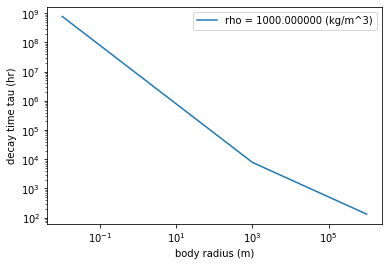

In [11]:
### calculate decay time scales for lunar particles
brad = np.asarray([1e-2,1.,1e3,1e6]) #m
masses = 4.*math.pi*dens*(brad**3)/3. #kg
xMoon = 20E6 #m
G_mks = 6.67408e-11 #mks
vKep = np.sqrt(G_mks*Mass_syn/xMoon) #m/s
rho_g = 1000. #kg/m^3
v_g = 0.95*vKep #m/s gas velocity; 0.95 = v_gas/v_kep
eta = 0.5*(1. - (0.95**2)) #parameter relating gas and Keplerian velocity, pressure/temp related
w_K = vKep/xMoon #angular velocity in s^-1
Tper = np.sqrt((xMoon**3)*4.*(math.pi**2)/(G_mks*Mass_syn)) #orbital period in s
v_r = v_g - vKep #m/s; relative vel bet gas and particle; u = v_r since there are no y or z components to the gas or particle
drag = math.pi*brad*brad*rho_g*v_r*v_r/masses #m/s^2
gvar = drag/(v_r*w_K) #g parameterization
t_spiral = np.abs(Tper*(1. + gvar*gvar)/(4.*math.pi*eta*gvar)) #s
T_SCALE_hr = 3600. # no. seconds in an hour

plt.figure()
plt.loglog(brad,t_spiral/T_SCALE_hr,label='rho = %f (kg/m^3)' %rho_g)
plt.xlabel('body radius (m)')
plt.ylabel('decay time tau (hr)')
plt.legend()
plt.show()
plt.close()

When a moonlet condenses out of a synestia, it will lose pressure support, but it will initially have the same velocity as the gas around it. The gas is moving at just below Keplerian velocities with zero velocity in z.

If a moonlet condenses in the midplane, its motion within the midplane will be very nearly circular. There is not much of a difference between the gas and the moonlet's speed initially or in time. Any follow-up attempts by gravity to stabilize the moonlet after losing pressure support are minimal in this case (the velocities of the moonlet will not change very much), so gas drag doesn't affect the motion of the moonlet heavily.

However, if a droplet condenses off the midplane, gravity accelerates the moonlet towards the midplane, creating a large velocity differential between the gas (zero velocity in z) and the moonlet. Gas drag will perturb the orbit, resulting in an elliptical orbit. The higher off the midplane and closer to the central body the droplet is, the more elliptical the orbit. The moonlet will approach the central body closely on one side of the orbit (nearest approach).

The location of the moon's nearest approach will travel closer to the central body with time. Eventually, the moonlet will travel close enough to the central body that it will become a part of the interior (planet-like center) of a synestia. In this particular case, that distance is 7e6 m. The simulation ends when the moonlet reaches this point. The time it takes the moonlet to reach this distance is called the decay time. The shorter the decay time, the faster the moonlet decays and the shorter survival time the moonlet has.

Based on the fastest accretion time in moon formation simulations, the minimum time in which a Moon-mass could grow within an Earth-mass synestia is 10 years. Compared to this, a single moonlet could survive <b>INSERT RESULTS HERE</b>. It's important to note that a single moonlet within a synestia is not alone. There are many droplets condensing out of the photosphere at once, which creates a nearly continuous torrential downpour of rock rain as the synestia cools. These moonlets will collide with one another and grow. How quickly the moonlets combine into larger masses relative to the decay of their orbits via gas drag is what will dictate whether a lunar mass could survive. <b>INSERT MASS GROWTH CURVE HERE?</b>

There is another factor as well. As a droplet descends into a synestia, the temperature and pressure of the gas surrounding the droplet will increase, with maximum temperature and pressure values at the midplane. A droplet must also combat vaporization in order to provide liquid material for the moon to grow from. This is a bit more complicated considering there are interactions with other droplets occurring, which may involve thermal buffering (some droplets at lower z act as shields and provide temperature buffers for the droplets behind them at greater z). I will not explore the effects of vaporization here but keep it in mind as you evaluate the decay times.

In [ ]:
#need to integrate over time, perhaps that should be in implications??
#why doesn't changing the mass affect the gas drag?
#need to work on density function and gas velocity function (% of sub-Keplerian)